# Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Step 2: Load the Cleaned Dataset

In [2]:
file_path = "../data/processed/clean_telco.csv"
df = pd.read_csv(file_path)

# Quick check
print(df.shape)
df.head()

(7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,29.85,-0.994194,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.064303,56.95,-0.173740,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.239504,53.85,-0.959649,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.512486,42.30,-0.195248,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.239504,70.70,-0.940457,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# Step 3.0: Select Features and Target for Classification

In [3]:
selected_features = [
    'tenure', 'TotalCharges',
    'Contract_One year', 'Contract_Two year',
    'InternetService_Fiber optic', 'InternetService_No',
    'PaymentMethod_Electronic check', 'SeniorCitizen'
]

X = df[selected_features]
y = df['Churn']

# 3.1 Verify

In [4]:
print("X shape:", X.shape)
print("y value counts:")
print(y.value_counts())

X shape: (7032, 8)
y value counts:
Churn
0    5163
1    1869
Name: count, dtype: int64


# Step 4.0 Train test-split

In [5]:
from sklearn.model_selection import train_test_split

# Split dataset with stratification on churn label
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 4.1 Verify

In [6]:
print("Train set:", y_train.value_counts(normalize=True))
print("Test set:", y_test.value_counts(normalize=True))


Train set: Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64
Test set: Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


# Step 5.0: Train the Classification Model

In [8]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Step 5.1 Verify

In [9]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_[0]):
    print(f"  {name:30s}: {coef:.4f}")

Intercept: [-1.53653098]
Coefficients:
  tenure                        : -1.3028
  TotalCharges                  : 0.6032
  Contract_One year             : -0.8587
  Contract_Two year             : -1.5956
  InternetService_Fiber optic   : 0.8639
  InternetService_No            : -0.8246
  PaymentMethod_Electronic check: 0.4766
  SeniorCitizen                 : 0.3448


# Step 6.1: Predict churn on test set

In [10]:
y_pred = model.predict(X_test)

# Step 6.2: Generate and plot confusion matrix

<Figure size 600x400 with 0 Axes>

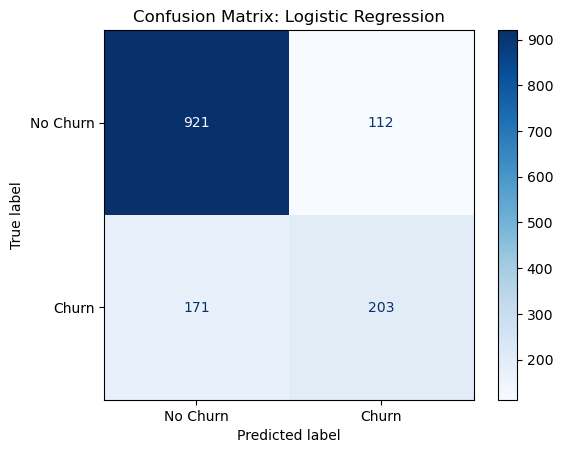

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])


plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.grid(False)
plt.show()

# Step 7: Evaluate

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

📊 Evaluation Metrics:
Accuracy : 0.7989
Precision: 0.6444
Recall   : 0.5428
F1 Score : 0.5893


# Step 8: Optional: Print full classification report

In [14]:
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))


📄 Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87      1033
       Churn       0.64      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



# Step 8: Verify & Diagnose the Churn Model
# 1. Check Class Balance

In [15]:
print("Churn class distribution in test set:")
print(y_test.value_counts(normalize=True))

Churn class distribution in test set:
Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


# 2. Plot Confusion Matrix Again (Labeled)

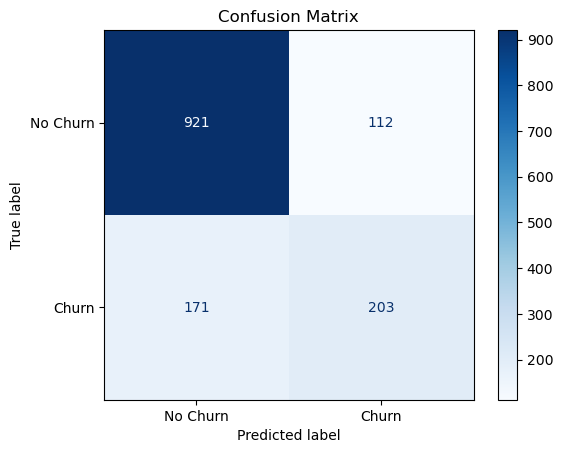

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# 3. Precision-Recall Tradeoff

In [17]:
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.87      1033
       Churn       0.64      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



# 4. Check Model Confidence (Optional)

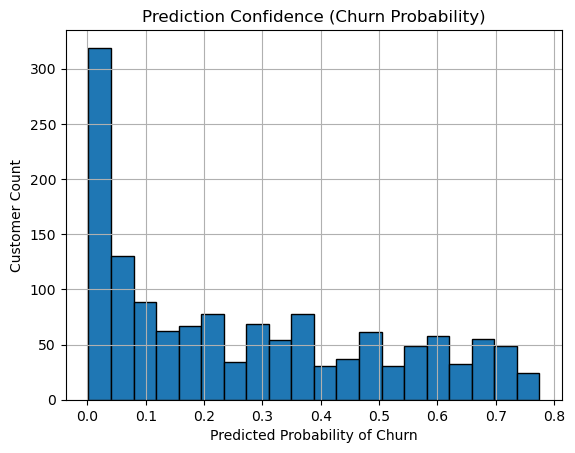

In [18]:
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of churn

plt.hist(y_probs, bins=20, edgecolor='k')
plt.title("Prediction Confidence (Churn Probability)")
plt.xlabel("Predicted Probability of Churn")
plt.ylabel("Customer Count")
plt.grid(True)
plt.show()
